## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_data = pd.merge(mouse_metadata,study_results)
# Display the data table for preview
full_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice_groupby = full_data.groupby("Mouse ID")["Mouse ID"].count()
number_of_mice  = len(number_of_mice_groupby)
number_of_mice 

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df2 = full_data.drop_duplicates(subset =["Mouse ID","Timepoint"], keep= False, inplace=False)


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

full_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df2 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_ID_cleaned = df2.groupby("Mouse ID")["Mouse ID"].count()
len_cleaned  = len(mouse_ID_cleaned)
len_cleaned

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = df2.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = df2.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = df2.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation = df2.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM = df2.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

mice_data = {'Mean': mean,
        'Median': median,
        'Variance': variance,
        'Standard Deviation': standard_deviation,
        'SEM': SEM
       } 

summary_data = pd.DataFrame(mice_data)
summary_data

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_data.describe()

,Mean,Median,Variance,Standard Deviation,SEM
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,50.989715,49.942960,47.878604,6.822623,0.502366
std,5.625107,4.712429,16.002942,1.215829,0.103294
min,40.216745,40.673236,23.486704,4.846308,0.320955
25%,52.491483,51.085014,40.249804,6.342952,0.475424
50%,53.060651,51.819532,46.293507,6.801941,0.528267
75%,54.183257,52.396036,60.738703,7.793357,0.579276
max,55.235638,53.698743,68.553577,8.279709,0.603860


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
##print datatable 
tested_mice = df2.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
forbar = pd.DataFrame(tested_mice)
forbar

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,151
Ramicane,228
Stelasyn,181


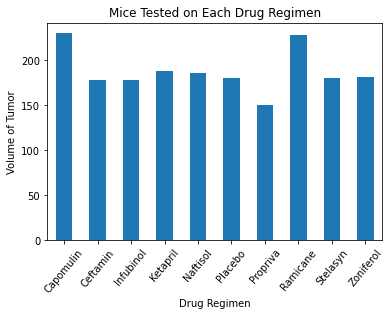

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
df = forbar.plot.bar(legend=False,rot=50)
plt.title("Mice Tested on Each Drug Regimen")
plt.ylabel("Volume of Tumor")
plt.savefig('barplot_pans')

In [11]:
forbar.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186


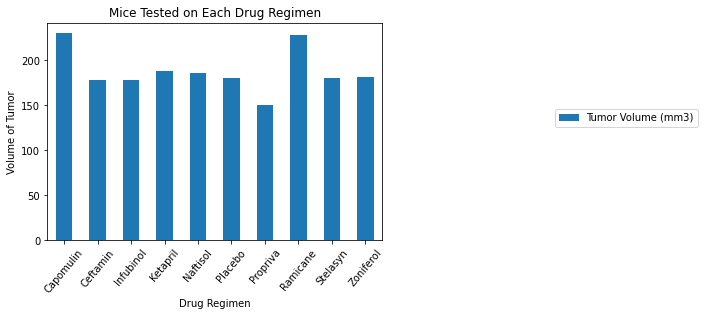

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
## refer to code from Project 1
## df["ICUBeds_Occ_AnyPat_Est_Avail"].value_counts().head(30).plot(kind="bar")
df = forbar.plot.bar(legend=False,rot=50)
plt.title("Mice Tested on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Volume of Tumor")
plt.legend(loc="lower left", bbox_to_anchor=(1.5, 0.5), fontsize='medium', title='')


#plt.title("Mice Tested on Each Drug Regimen")
#plt.ylabel("Tumor of Volume")
#plt.savefig('barplot_plot')

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas.
## print datatable

mouse_gender = df2.groupby("Sex").count()
mouse_gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,925,925,925,925,925,925,925
Male,958,958,958,958,958,958,958


In [14]:
## get labels together 

gender_labels = [df2['Sex'].unique()]
gender_list = list(mouse_gender.index)
gender_list

['Female', 'Male']

In [15]:
## get gender count

gender_count = [mouse_gender["Mouse ID"]]
gender_count

[Sex
 Female    925
 Male      958
 Name: Mouse ID, dtype: int64]

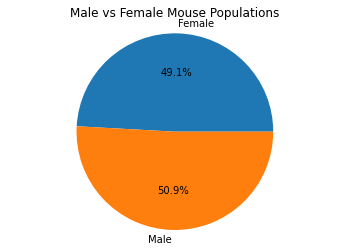

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

## pick your colours 
colors = ["lightsky blue", "pink"]


##plt.pie(gender_count, labels=gender_labels, colors=colors,
        ##autopct="%1.1f%%", shadow=True, startangle=180)
##plt.title('Male vs Female Mouse Population')
##plt.ylabel('Sex')

##plt.savefig('piechart1')
##plt.show()


labels = ['Female', 'Male']
sizes = [9.25, 9.58]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')# Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Male vs Female Mouse Populations')


plt.show()

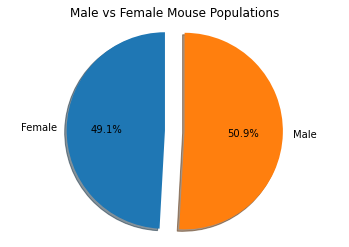

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


# Pie chart, where the slices will be ordered and plotted counter-clockwise
labels = ['Female','Male', ]
sizes = [9.25, 9.58]


# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.1, 0.1)

fig, ax = plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Male vs Female Mouse Populations')


plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

## use loc to access a group of rows and columns
Capomulin_df = df2.loc[df2["Drug Regimen"] == "Capomulin",:]
Ramicane_df = df2.loc[df2["Drug Regimen"] == "Ramicane",:]
Infubinol_df = df2.loc[df2["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = df2.loc[df2["Drug Regimen"] == "Ceftamin",:]

## capomulin

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, df2, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [22]:
# quartiles and IQR
## review Matplotlib activity
## code from Matplotlib activity

cap_tumor_volume = Capomulin_merge["Tumor Volume (mm3)"]
quartiles = cap_tumor_volume.quantile([0.25,0.5,0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]

iqr = upper_quartile-lower_quartile

print(f"The lower quartile of Capomulin Tumor is: {lower_quartile}")
print(f"The upper quartile of Capomulin Tumor is: {upper_quartile}")
print(f"The interquartile range of Capomulin Tumor is: {iqr}")
print(f"The the median of Capomulin Tumor is: {quartiles[0.5]} ")

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin Tumor is: 32.37735684
The upper quartile of Capomulin Tumor is: 40.1592203
The interquartile range of Capomulin Tumor is: 7.781863460000004
The the median of Capomulin Tumor is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [24]:
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, df2, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [25]:
ram_tumor_volume = Ramicane_merge["Tumor Volume (mm3)"]
quartiles = ram_tumor_volume.quantile([0.25,0.5,0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]

iqr = upper_quartile-lower_quartile

print(f"The lower quartile of Ramicane Tumor is: {lower_quartile}")
print(f"The upper quartile of Ramicane Tumor is: {upper_quartile}")
print(f"The interquartile range of Ramicane Tumor is: {iqr}")
print(f"The the median of Ramicane Tumor is: {quartiles[0.5]} ")

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane Tumor is: 31.56046955
The upper quartile of Ramicane Tumor is: 40.65900627
The interquartile range of Ramicane Tumor is: 9.098536719999998
The the median of Ramicane Tumor is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [26]:
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, df2, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [27]:
inf_tumor_volume = Infubinol_merge["Tumor Volume (mm3)"]
quartiles = inf_tumor_volume.quantile([0.25,0.5,0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]

iqr = upper_quartile-lower_quartile

print(f"The lower quartile of Infubinol Tumor is: {lower_quartile}")
print(f"The upper quartile of Infubinol Tumor is: {upper_quartile}")
print(f"The interquartile range of Infubinol Tumor is: {iqr}")
print(f"The the median of Infubinol Tumor is: {quartiles[0.5]} ")

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol Tumor is: 54.04860769
The upper quartile of Infubinol Tumor is: 65.52574285
The interquartile range of Infubinol Tumor is: 11.477135160000003
The the median of Infubinol Tumor is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [28]:
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, df2, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [29]:
cef_tumor_volume = Ceftamin_merge["Tumor Volume (mm3)"]
quartiles = cef_tumor_volume.quantile([0.25,0.5,0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]

iqr = upper_quartile-lower_quartile

print(f"The lower quartile of Ceftamin Tumor is: {lower_quartile}")
print(f"The upper quartile of Ceftamin Tumor is: {upper_quartile}")
print(f"The interquartile range of Ceftamin Tumor is: {iqr}")
print(f"The the median of Ceftamin Tumor is: {quartiles[0.5]} ")

lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin Tumor is: 48.72207785
The upper quartile of Ceftamin Tumor is: 64.29983003
The interquartile range of Ceftamin Tumor is: 15.577752179999997
The the median of Ceftamin Tumor is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

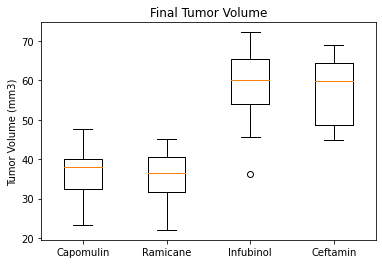

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
## code from Matplotlib activity

drug_box_plot = [cap_tumor_volume, ram_tumor_volume, inf_tumor_volume, cef_tumor_volume]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(drug_box_plot, labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

In [85]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_df = df2.loc[df2["Mouse ID"] == "b128",:]
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


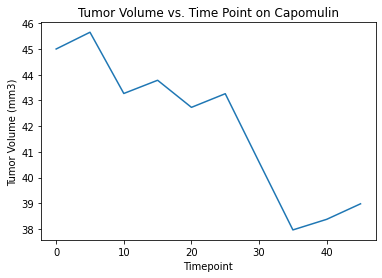

In [86]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis_data = Capomulin_df["Timepoint"]
points = Capomulin_df["Tumor Volume (mm3)"]
plt.title('Tumor Volume vs. Time Point on Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis_data, points)
plt.show()


In [87]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df.groupby(['Mouse ID']).mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7


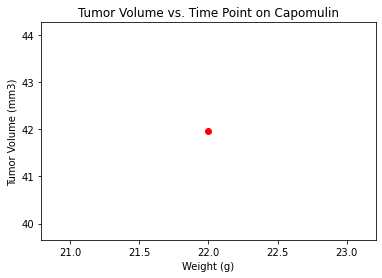

In [89]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
## unsure why one point is showing
Capomulin_avg = Capomulin_df.groupby(['Mouse ID']).mean()
x_axis_data = Capomulin_avg["Weight (g)"]
points = Capomulin_avg["Tumor Volume (mm3)"]
plt.title('Tumor Volume vs. Time Point on Capomulin')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis_data, points, marker="o", color="red")
plt.show()

## Correlation and Regression

In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = (st.pearsonr(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])[0],2)
## not possbile because of average 

ValueError: x and y must have length at least 2.